In [168]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose 
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings
warnings.filterwarnings('ignore')

In [169]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [170]:
# Step 1: Load Zomato stock data
zomato = yf.download('ZOMATO.NS', start='2021-07-01', end='2025-06-01')  # Adjust date range as needed
df = zomato[['Close']]

[*********************100%***********************]  1 of 1 completed


In [171]:
df

Price,Close
Ticker,ZOMATO.NS
Date,
2021-07-23,126.000000
2021-07-26,140.649994
2021-07-27,132.899994
2021-07-28,131.199997
2021-07-29,141.550003
...,...
2025-05-26,226.800003
2025-05-27,224.789993


In [172]:
# Display DataFrame information

df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 952 entries, 2021-07-23 to 2025-05-30
Data columns (total 1 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   (Close, ZOMATO.NS)  952 non-null    float64
dtypes: float64(1)
memory usage: 14.9 KB


In [173]:
# Check the type of the df1 data frame 
type(df)

pandas.core.frame.DataFrame

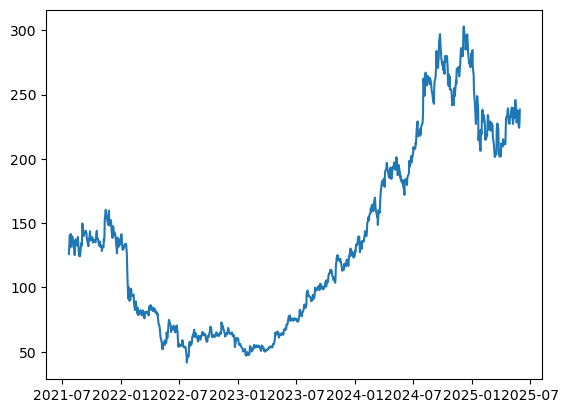

In [174]:
# Plot the "High" values over time

import matplotlib.pyplot as plt# Import the module
import pandas as pd 
plt.plot(df.index, df, [])
plt.show()  # Display the plot 


In [175]:
train_size = int(len(df1) * 0.8)
train, test = df[:train_size], df[train_size:]


# Decomposition

In [176]:
additive_decompose = seasonal_decompose(df1['Close'],model='additve',period=30)
trend = additive_decompose.trend
seasonality = additive_decompose.seasonal
resid = additive_decompose.resid

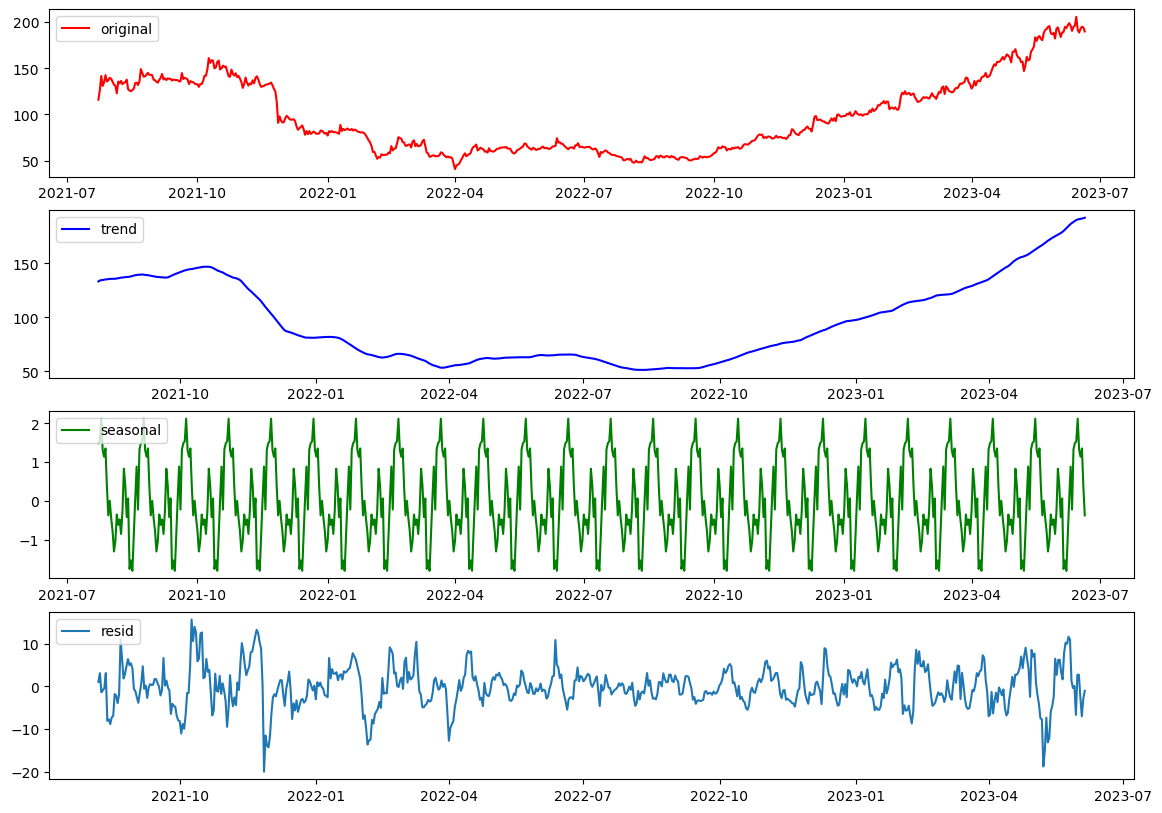

In [177]:
plt.figure(figsize=(14,10))
plt.subplot(411)
plt.plot(df1['Close'],label='original',color='r')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(trend,label='trend',color='b')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(seasonality,label='seasonal',color='g')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(resid,label='resid')
plt.legend(loc='upper left')

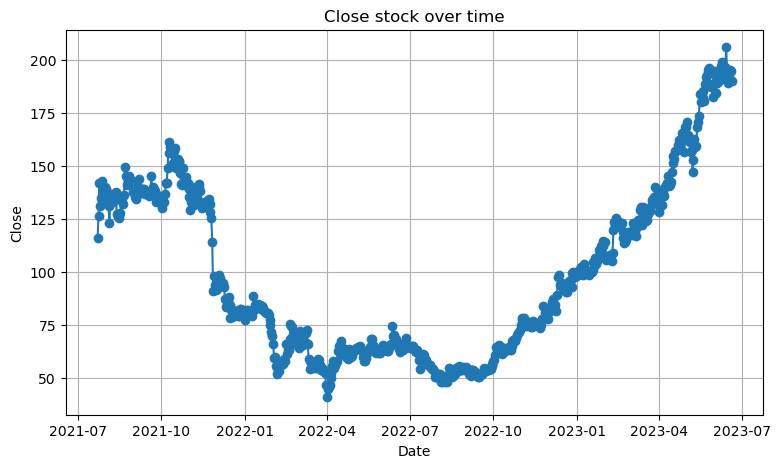

In [178]:
plt.figure(figsize=(9,5))
plt.plot(df1, marker='o', linestyle='-')
plt.title("Close stock over time")
plt.xlabel("Date")
plt.ylabel("Close")
plt.grid()
plt.show()


In [179]:
result = adfuller(df1['Close'])
print("ADF Statistics:", result[0])
print("p-value:", result[1])
if result[1] > 0.05:
    print("The data is non-stationary.Differencing is required.")
else:
    print("The data is stationary")

ADF Statistics: 0.02693566632717311
p-value: 0.960703763893124
The data is non-stationary.Differencing is required.


# Differencing

In [180]:
df_diff = df.diff().dropna()

In [181]:
result = adfuller(df_diff)
print("ADF Statistics:", result[0])
print("p-value:", result[1])
if result[1] > 0.05:
    print("The data is non-stationary.Differencing is required.")
else:
    print("The data is stationary")

ADF Statistics: -22.95832283541729
p-value: 0.0
The data is stationary


In [182]:
df

Price,Close
Ticker,ZOMATO.NS
Date,
2021-07-23,126.000000
2021-07-26,140.649994
2021-07-27,132.899994
2021-07-28,131.199997
2021-07-29,141.550003
...,...
2025-05-26,226.800003
2025-05-27,224.789993


# ACF plot & PACF plot

Text(0.5, 1.0, 'PACF Plot of Zomato Close ')

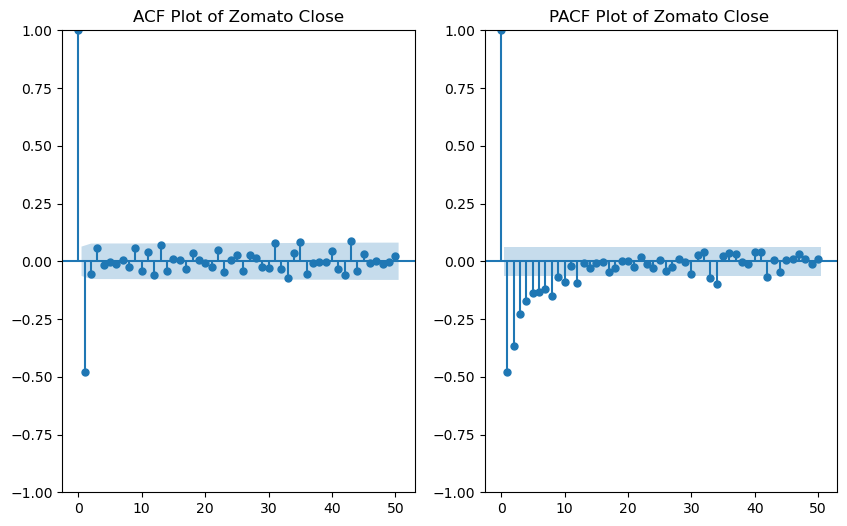

In [183]:
plt.figure(figsize=(10,6))
#acf plot
plt.subplot(1,2,1)
plot_acf(df['Close'].diff().diff().dropna(),ax=plt.gca(),lags=50)
plt.title('ACF Plot of Zomato Close')

#pacf plot
plt.subplot(1,2,2)
plot_pacf(df['Close'].diff().diff().dropna(),ax=plt.gca(),lags=50,method='ywm')
plt.title('PACF Plot of Zomato Close ')

In [184]:
train = df[:int(0.8 * len(df))]
test = df[int(0.8 * len(df)):]

# AR

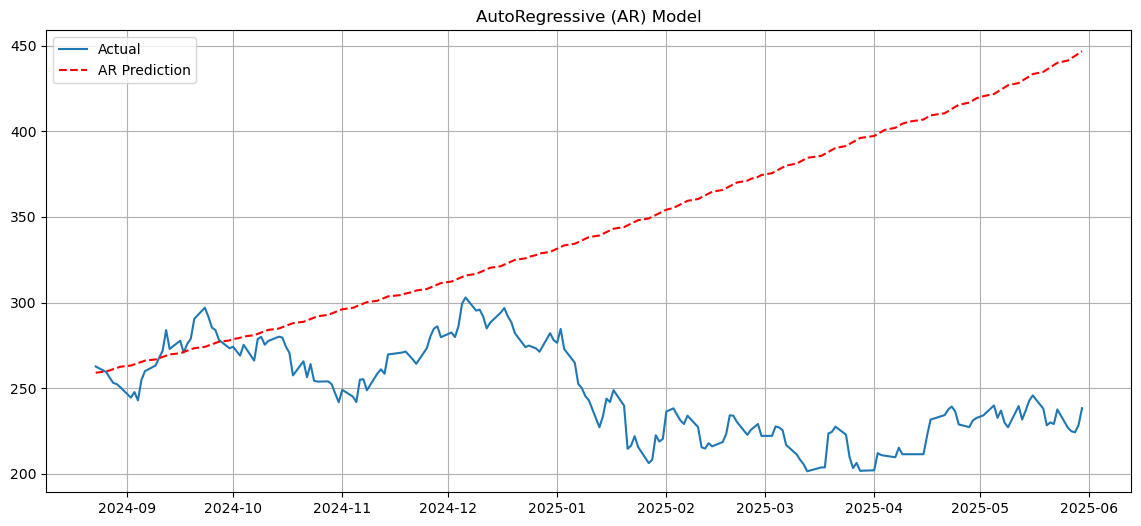

AR Model RMSE: 120.94


In [185]:
# Fit AR model
ar_model = AutoReg(train, lags=5).fit()

# Predict
ar_pred = ar_model.predict(start=len(train), end=len(train) + len(test) - 1, dynamic=False)

# Plot AR results
plt.figure(figsize=(14, 6))
plt.plot(test.index, test, label='Actual')
plt.plot(test.index, ar_pred, label='AR Prediction', color='red', linestyle='--')
plt.title('AutoRegressive (AR) Model')
plt.legend()
plt.grid(True)
plt.show()

# Evaluate AR model
ar_rmse = round(np.sqrt(mean_squared_error(test, ar_pred)), 2)
print("AR Model RMSE:", ar_rmse)

# MA

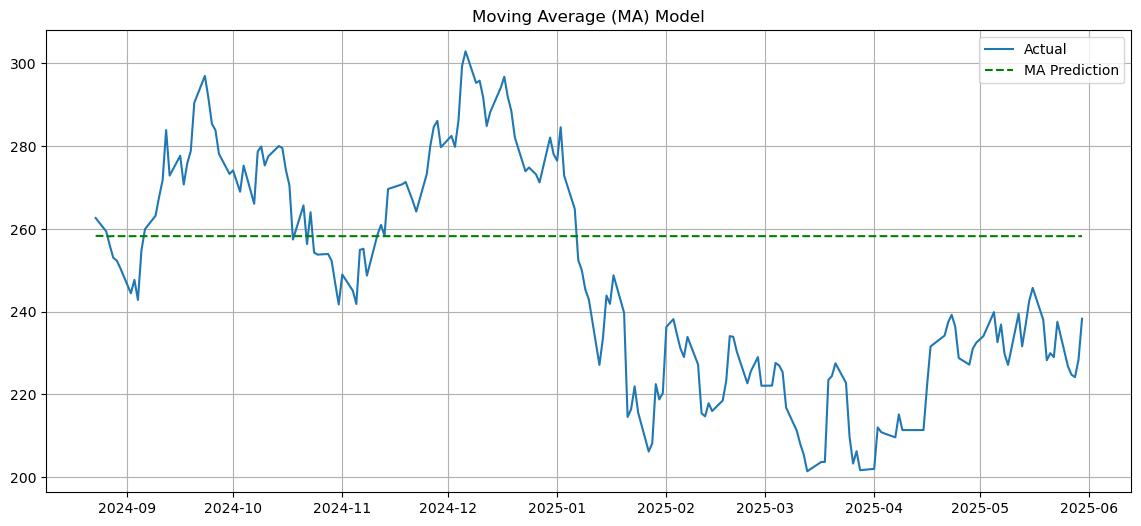

MA Model RMSE: 28.64


In [186]:
# Fit MA model (ARIMA with p=2, d=1, q=2)
ma_model = ARIMA(train, order=(2, 1, 2)).fit()

# Predict
ma_pred = ma_model.predict(start=len(train), end=len(train) + len(test) - 1)

# Plot MA results
plt.figure(figsize=(14, 6))
plt.plot(test.index, test, label='Actual')
plt.plot(test.index, ma_pred, label='MA Prediction', color='green', linestyle='--')
plt.title('Moving Average (MA) Model')
plt.legend()
plt.grid(True)
plt.show()

# Evaluate MA model
ma_rmse = round(np.sqrt(mean_squared_error(test, ma_pred)), 2)
print("MA Model RMSE:", ma_rmse)


# ARIMA  MODEL

In [187]:
# Fit ARIMA model (p, d, q) = (2,1,2) base on ACF/PACF analysis

model = ARIMA(df, order=(2,1,2))
model_fit = model.fit()

In [188]:
#Print model summary 

print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:        Close_ZOMATO.NS   No. Observations:                  952
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -2738.955
Date:                Thu, 05 Jun 2025   AIC                           5487.910
Time:                        18:26:56   BIC                           5512.198
Sample:                             0   HQIC                          5497.164
                                - 952                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3050      0.293     -1.041      0.298      -0.879       0.269
ar.L2          0.6458      0.288      2.245      0.025       0.082       1.210
ma.L1          0.2904      0.279      1.042      0.2

In [189]:
forecast_steps = 12
forecast = model_fit.forecast(steps=forecast_steps)

#forecasts 12 future time points 

In [190]:
df.shape

(952, 1)

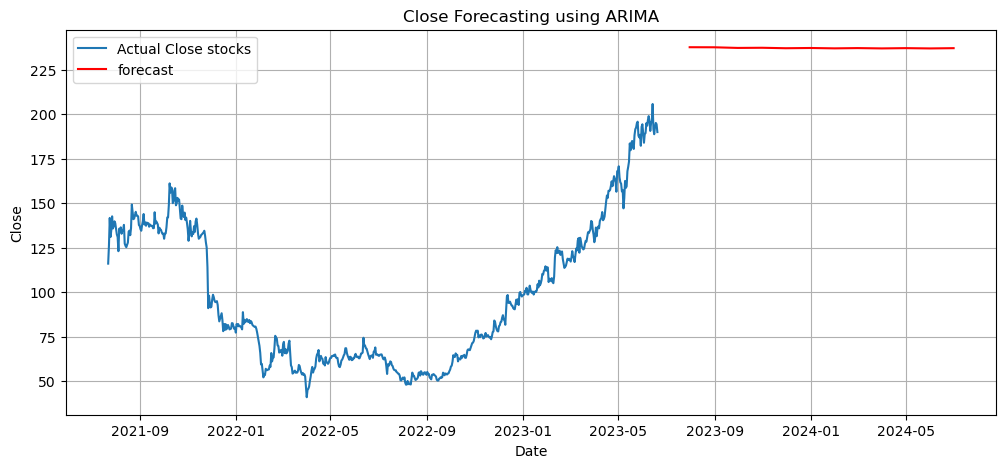

In [191]:
plt.figure(figsize=(12,5))
plt.plot(df1, label="Actual Close stocks")
plt.plot(pd.date_range(df1.index[-1],periods=forecast_steps+1, freq="M")[1:], forecast, label="forecast",color="red")
plt.title("Close Forecasting using ARIMA")
plt.xlabel("Date")
plt.ylabel("Close")
plt.legend()
plt.grid()
plt.show()

# SARIMA

In [192]:
 model = SARIMAX(train, 
                order=(2, 1, 2), 
                seasonal_order=(2, 1, 2, 7),
                enforce_stationarity=False,
                enforce_invertibility=False)

model_fit = model.fit()
print(model_fit.summary())

                                     SARIMAX Results                                     
Dep. Variable:                   Close_ZOMATO.NS   No. Observations:                  761
Model:             SARIMAX(2, 1, 2)x(2, 1, 2, 7)   Log Likelihood               -1955.574
Date:                           Thu, 05 Jun 2025   AIC                           3929.147
Time:                                   18:27:13   BIC                           3970.558
Sample:                                        0   HQIC                          3945.118
                                           - 761                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5343      0.402      1.329      0.184      -0.254       1.322
ar.L2         -0.4661      0.305     -1.529

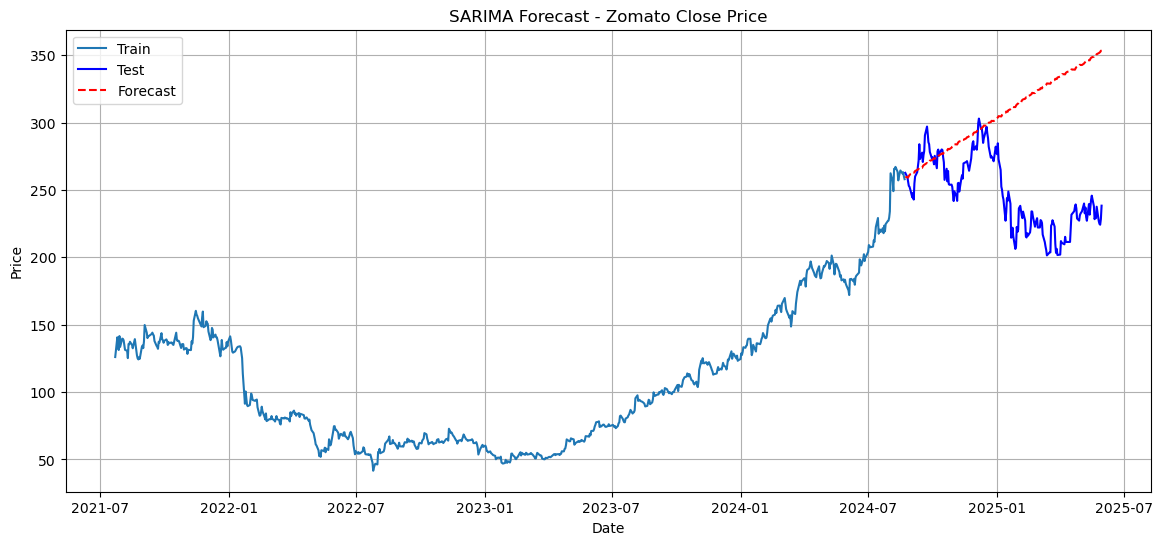

In [193]:
# Forecast same length as test set
forecast = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)

# Plot actual vs predicted
plt.figure(figsize=(14, 6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test', color='blue')
plt.plot(test.index, forecast, label='Forecast', color='red', linestyle='--')
plt.title('SARIMA Forecast - Zomato Close Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()
